# OULAD - Data Analysis


# EDA
Data Order
1. Student Registration
2. Student Info
3. Courses
4. Assessment
5. Student Assessment
6. Vle
7. Student Vle

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Student Registration

In [102]:
#Loading data student registration

data_studentReg = pd.read_csv('studentRegistration.csv')
data_studentReg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [103]:
data_studentReg.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [104]:
data_studentReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [105]:
data_studentReg.isnull().any()

code_module            False
code_presentation      False
id_student             False
date_registration       True
date_unregistration     True
dtype: bool

In [106]:
data_studentReg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [107]:
#Handling missing value menggunakan data binner dimana 0 (data kosong), 1(data value)

data_studentReg['date_unregistration']=['0' if pd.isnull(days) else '1' for days in data_studentReg['date_unregistration']]

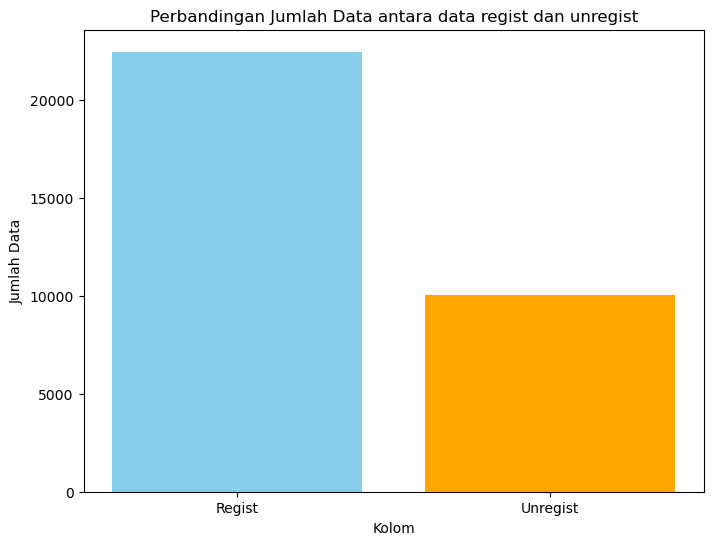

Jumlah data dalam regist: 22476
Jumlah data dalam unregist: 10072


In [108]:
#visualisasi perbandingan registration & unregistration

countRegist = data_studentReg['date_registration'].count()
countUnregist = data_studentReg['date_unregistration'].value_counts().get(1, 0)
# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(['Regist', 'Unregist'], [countRegist-countUnregist, countUnregist], color=['skyblue', 'orange'])
plt.title('Perbandingan Jumlah Data antara data regist dan unregist')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data')
plt.show()

print(f"Jumlah data dalam regist: {countRegist-countUnregist}")
print(f"Jumlah data dalam unregist: {countUnregist}")

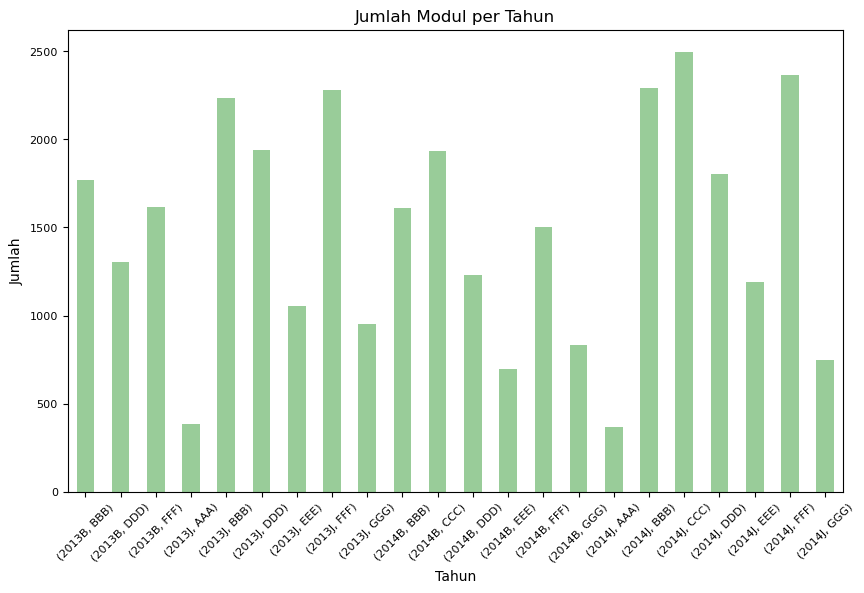

In [109]:
countModul = data_studentReg.groupby(['code_presentation', 'code_module'])['code_module'].count()

plt.figure(figsize=(10, 6))
countModul.plot(kind='bar', color='green', alpha=0.4)
plt.title('Jumlah Modul per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

2. Student Info

In [110]:
#Loading data student info

data_studentInfo = pd.read_csv('studentInfo.csv')
data_studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [15]:
data_studentInfo.isnull().any()

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

In [16]:
data_studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [17]:
data_studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [18]:
data_studentInfo.duplicated().sum()

0

<Axes: xlabel='gender', ylabel='count'>

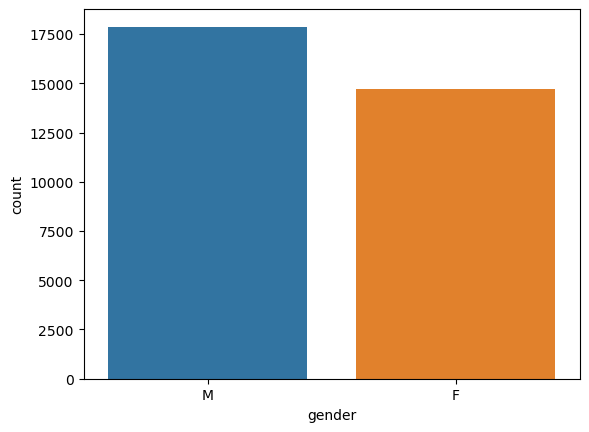

In [20]:
sns.countplot(data=data_studentInfo, x='gender')

In [21]:
data_studentInfo.gender.unique

<bound method Series.unique of 0        M
1        F
2        F
3        F
4        F
        ..
32588    F
32589    F
32590    F
32591    F
32592    F
Name: gender, Length: 32593, dtype: object>

In [28]:
data_studentInfo.id_student.nunique()

28785

In [113]:
#median kolom 'num_of_prev_attempts' dan 'studied_credits' berdasarkan kelompok 'id_student'

medianCount = data_studentInfo[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()
medianCount = medianCount.reset_index()
medianCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            28785 non-null  int64  
 1   num_of_prev_attempts  28785 non-null  float64
 2   studied_credits       28785 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 674.8 KB


In [114]:
student_profile = data_studentInfo[['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band']].drop_duplicates()
student_profile

,id_student,gender,region,highest_education,imd_band,age_band
0,11391,M,East Anglian Region,HE Qualification,90-100%,55<=
1,28400,F,Scotland,HE Qualification,20-30%,35-55
2,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55
3,31604,F,South East Region,A Level or Equivalent,50-60%,35-55
4,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35
...,...,...,...,...,...,...
32588,2640965,F,Wales,Lower Than A Level,10-20,0-35
32589,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55
32590,2648187,F,South Region,A Level or Equivalent,20-30%,0-35
32591,2679821,F,South East Region,Lower Than A Level,90-100%,35-55


In [115]:
student_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28857 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         28857 non-null  int64 
 1   gender             28857 non-null  object
 2   region             28857 non-null  object
 3   highest_education  28857 non-null  object
 4   imd_band           27877 non-null  object
 5   age_band           28857 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


<Axes: >

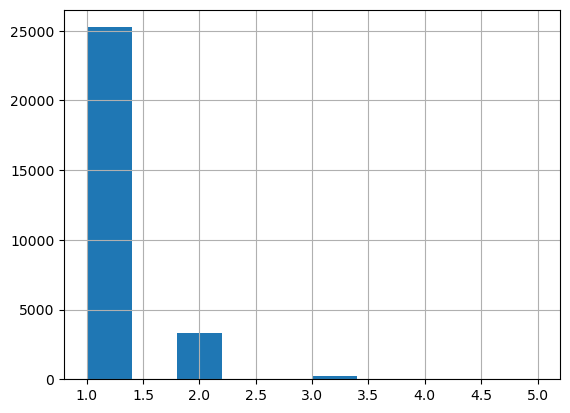

In [33]:
student_ages = data_studentInfo[['id_student', 'age_band']].groupby(['id_student']).count()
student_ages = student_ages.reset_index()
student_ages.age_band.hist()

3. Courses

In [36]:
#Loading data courses

data_course = pd.read_csv('courses.csv')
data_course

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [37]:
data_course.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [38]:
data_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [39]:
data_course.isnull().any()

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

In [40]:
data_course.duplicated().any()

False

In [42]:
data_course['code_module'].nunique()

7

In [43]:
data_course['code_presentation'].nunique()

4

<Axes: xlabel='code_module', ylabel='count'>

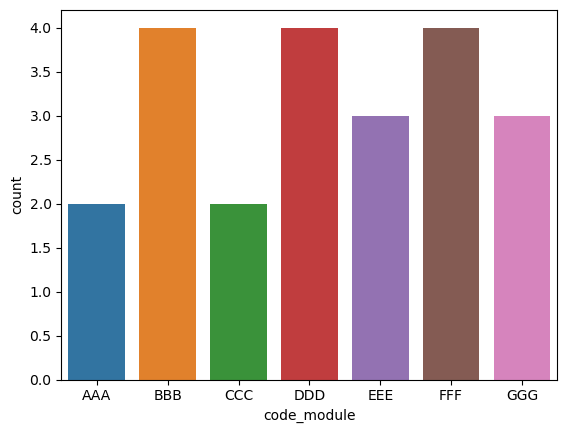

In [45]:
sns.countplot(data=data_course, x='code_module')

<Axes: xlabel='code_presentation', ylabel='count'>

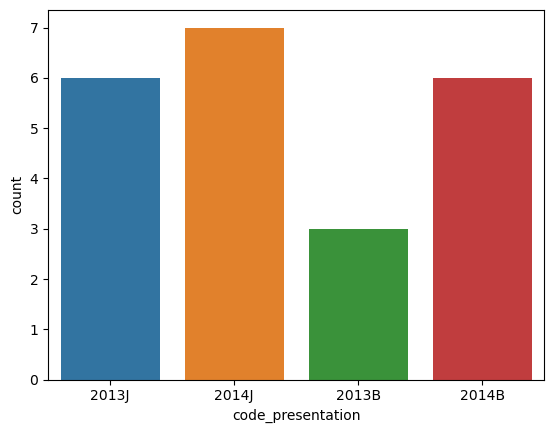

In [46]:
sns.countplot(data=data_course, x='code_presentation')

In [116]:
data_course["code_module_presentation"]=data_course[['code_module','code_presentation']].agg('-'.join,axis=1)
courses = data_course.drop(columns=['code_module','code_presentation'])
courses

,module_presentation_length,code_module_presentation
0,268,AAA-2013J
1,269,AAA-2014J
2,268,BBB-2013J
3,262,BBB-2014J
4,240,BBB-2013B
5,234,BBB-2014B
6,269,CCC-2014J
7,241,CCC-2014B
8,261,DDD-2013J
9,262,DDD-2014J


4. Assessment

In [49]:
#Loading data assessment

data_assessment = pd.read_csv('assessments.csv')
data_assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [50]:
data_assessment.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [51]:
data_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [52]:
data_assessment.isnull().any()

code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
date                  True
weight               False
dtype: bool

In [53]:
data_assessment.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [56]:
data_assessment = data_assessment.dropna(subset=['date'])

In [57]:
data_assessment.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

5. Student Assessment

In [118]:
#Loading data student assessment

data_studentAssess = pd.read_csv('studentAssessment.csv')
data_studentAssess

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [60]:
data_studentAssess.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [61]:
data_studentAssess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [62]:
data_studentAssess.isnull().any()

id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score              True
dtype: bool

In [64]:
data_studentAssess.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [69]:
data_studentAssess = data_studentAssess.dropna(subset=['score'])

In [70]:
data_studentAssess.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [71]:
data_studentAssess['is_banked'].nunique()

2

In [72]:
groupby_banked = data_studentAssess.groupby('is_banked')['score'].count().reset_index()
groupby_banked

,is_banked,score
0,0,171831
1,1,1908


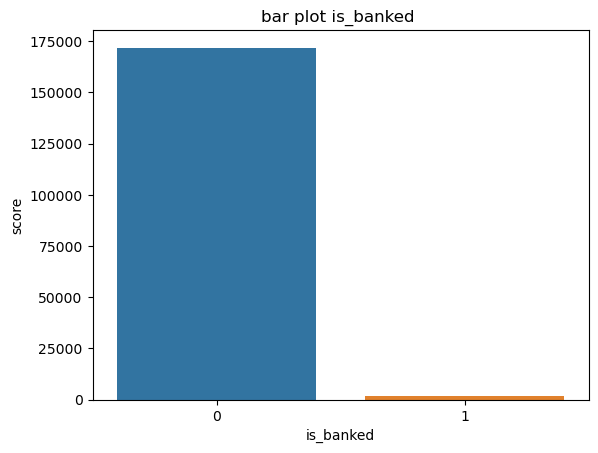

In [73]:
#create bar plot
sns.barplot(x='is_banked', y='score', data=groupby_banked)

#create label 
plt.xlabel('is_banked')
plt.ylabel('score')
plt.title('bar plot is_banked ')

#show plot
plt.show()

6. VLE

In [74]:
#Loading data vle

data_vle = pd.read_csv('vle.csv')
data_vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [76]:
data_vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [77]:
data_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [78]:
data_vle.isnull().any()

id_site              False
code_module          False
code_presentation    False
activity_type        False
week_from             True
week_to               True
dtype: bool

In [79]:
data_vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [80]:
# mengisi nilai yang kosong (NaN) menjadi angka 0 pada fitur week_from
data_vle['week_from'] = data_vle['week_from'].fillna(0)

In [81]:
# mengisi nilai yang kosong (NaN) menjadi angka 0 pada fitur week_to
data_vle['week_to'] = data_vle['week_to'].fillna(0)

In [82]:
data_vle.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

[Text(0, 0, 'resource'),
 Text(1, 0, 'oucontent'),
 Text(2, 0, 'url'),
 Text(3, 0, 'homepage'),
 Text(4, 0, 'subpage'),
 Text(5, 0, 'glossary'),
 Text(6, 0, 'forumng'),
 Text(7, 0, 'oucollaborate'),
 Text(8, 0, 'dataplus'),
 Text(9, 0, 'quiz'),
 Text(10, 0, 'ouelluminate'),
 Text(11, 0, 'sharedsubpage'),
 Text(12, 0, 'questionnaire'),
 Text(13, 0, 'page'),
 Text(14, 0, 'externalquiz'),
 Text(15, 0, 'ouwiki'),
 Text(16, 0, 'dualpane'),
 Text(17, 0, 'repeatactivity'),
 Text(18, 0, 'folder'),
 Text(19, 0, 'htmlactivity')]

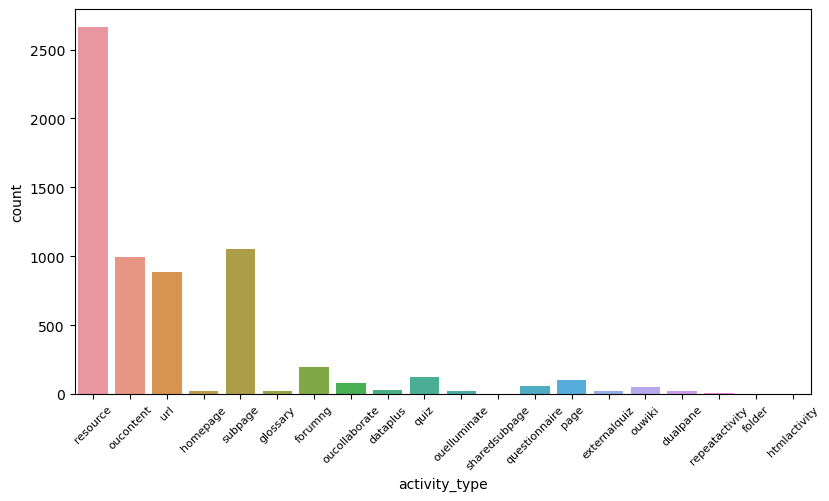

In [119]:
plt.figure(figsize=(9.5,5))
plot = sns.countplot(data=data_vle, x='activity_type')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize=8)

In [86]:
data_vle["code_module_presentation"]=data_vle[['code_module','code_presentation']].agg('-'.join,axis=1)
vleX = data_vle.drop(columns=['code_module','code_presentation'])
vleX

,id_site,activity_type,week_from,week_to,code_module_presentation
0,546943,resource,0.0,0.0,AAA-2013J
1,546712,oucontent,0.0,0.0,AAA-2013J
2,546998,resource,0.0,0.0,AAA-2013J
3,546888,url,0.0,0.0,AAA-2013J
4,547035,resource,0.0,0.0,AAA-2013J
...,...,...,...,...,...
6359,897063,resource,0.0,0.0,GGG-2014J
6360,897109,resource,0.0,0.0,GGG-2014J
6361,896965,oucontent,0.0,0.0,GGG-2014J
6362,897060,resource,0.0,0.0,GGG-2014J


7. Student VLE

In [87]:
#Loading data studentVLE

data_studentVle = pd.read_csv('studentVle.csv')
data_studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [88]:
data_studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [89]:
data_studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [90]:
data_studentVle.isnull().any()

code_module          False
code_presentation    False
id_student           False
id_site              False
date                 False
sum_click            False
dtype: bool

In [91]:
data_studentVle.duplicated().sum()

787170

In [120]:
studentVle = data_studentVle[data_studentVle['date'] >= 0]
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
10847,AAA,2013J,345357,546667,0,3
10848,AAA,2013J,345357,546883,0,1
10849,AAA,2013J,345357,546732,0,14
10850,AAA,2013J,345357,546614,0,5
10851,AAA,2013J,345357,546876,0,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


<Axes: ylabel='code_module'>

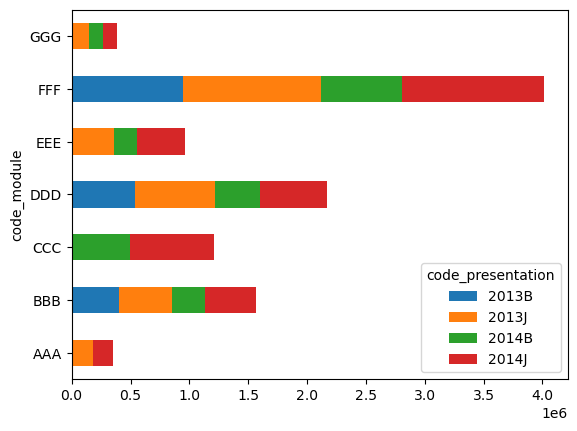

In [94]:
pd.crosstab(data_studentVle.code_module, data_studentVle.code_presentation).plot.barh(stacked = True)